In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Download this [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) and save it in your data folder. Download only the training set for now.

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Check how many variables and observations we're dealing with using shape

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Exploring the Target Variable  
The goal of this competition was to predict the price of a house. These values are stored in the variable SalePrice.
  
Let's check the descriptive statistics and the histogram:



In [6]:
# descriptive statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

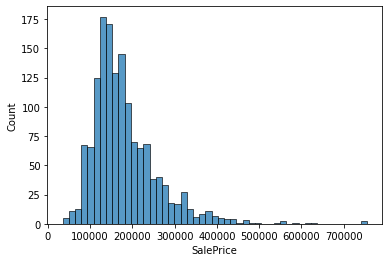

In [7]:
# histogram
sns.histplot(df_train['SalePrice'])

## Relationship Between the Target Variable and Predictors
  
First, let's start with some common sense (or ideally domain knowledge):

- Do we think about this variable when we are buying a house? (e.g. when we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
- If so, how important would this variable be? (e.g. what is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
- Is this information already described in any other variable? (e.g. if 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).
- We can print a list of all columns:

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Takes forever but if you have a powerful computer try it. Otherwise, subset the columns you are interested on
# sns.pairplot(df_train)

Of course, you might want to choose the ones that seem more meaningful to you and plot 1 by 1. Also consider this second option if you have many variables.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

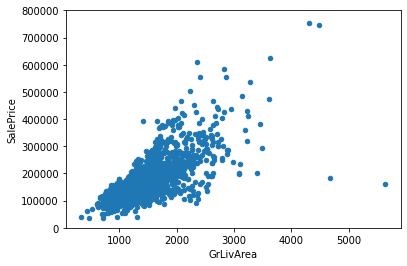

In [10]:
#scatter plot grlivarea vs. SalePrice
var = 'GrLivArea'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

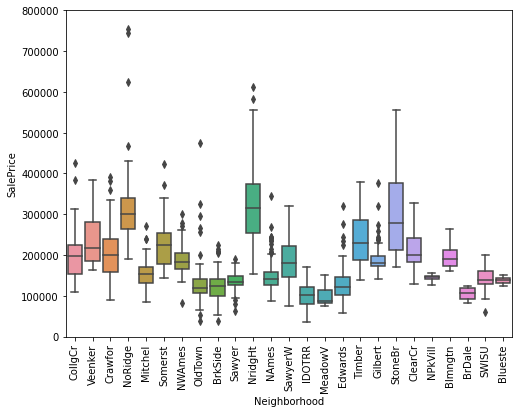

In [11]:
# Neighborhood
var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

<AxesSubplot:>

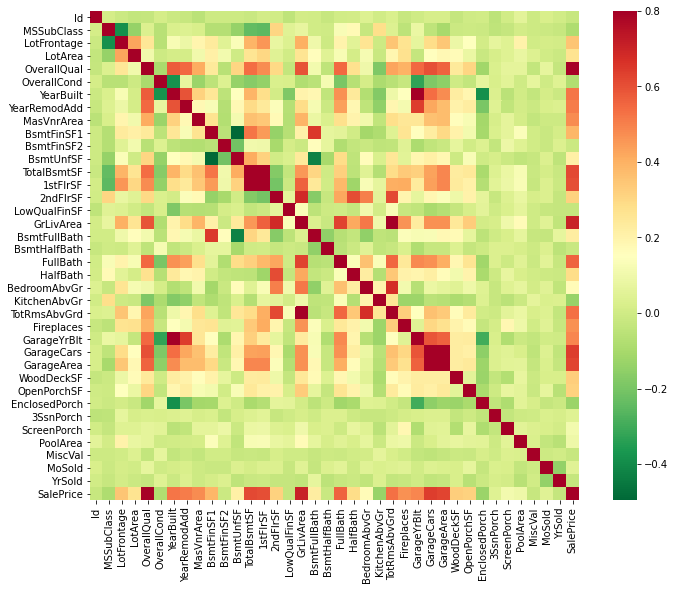

In [12]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

To make it more readable we can plot only those variables that correlate with the target variable more than 0.5:



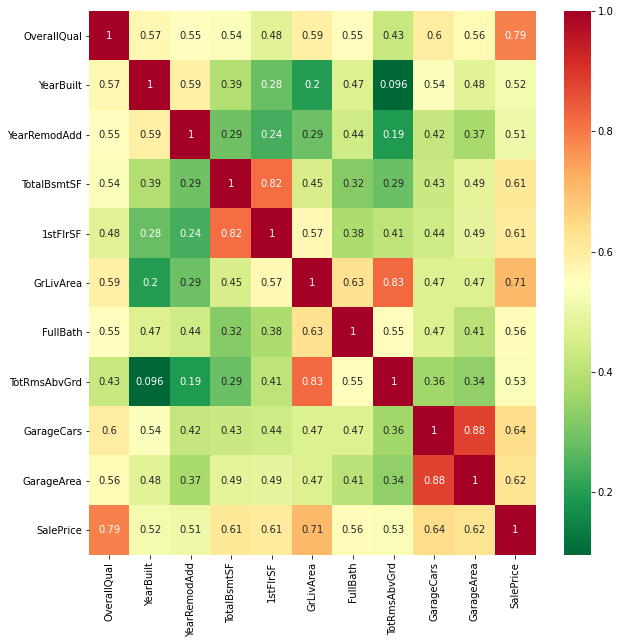

In [13]:
# most correlated features with SalePrice
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

Thoughts on this?

## Outlier Detection

Let's check the values of our target variable together with the other numeric attributes we identified as important in the previous tutorial:

* TotalBsmtSF
* GrLivArea

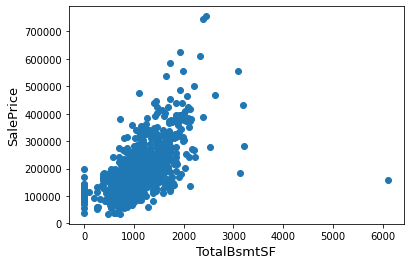

In [14]:

fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

What do you notice?? 

Now we are going to remove this outlier from our dataset. We will remove all observations that have more than 5,000 square feet of basement and a price lower than $300,000:

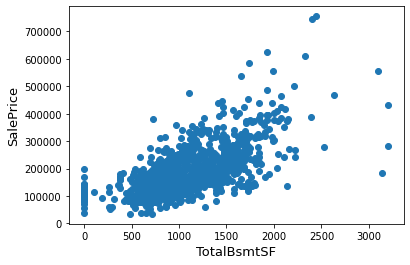

In [15]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

Let's check another numeric variable from the output of the previous tutorial: GrLivArea.

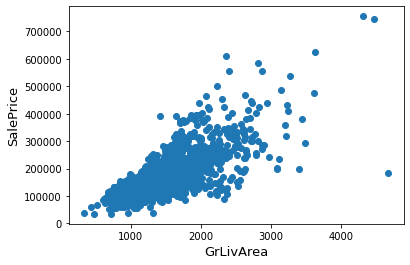

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

What do you think?

Remove the outliers as you think it should be. 

Anyone willing to share their code on Slack or Zoom chat? Or send a screenshot in Slack of what they got?

Do you think removing outliers is a good idea? Why or Why not? Do you have any other inputs?

## Null Value Replacement

In [17]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995888
MiscFeature,1405,0.962988
Alley,1368,0.937629
Fence,1178,0.807402
FireplaceQu,690,0.472927
LotFrontage,259,0.177519
GarageCond,81,0.055517
GarageType,81,0.055517
GarageYrBlt,81,0.055517
GarageFinish,81,0.055517


There are a couple of columns, where most of the values are missing. We can get rid of these since they don't have any value for us.

In [18]:
# drop 5 columns with the biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [19]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [20]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

LotFrontage     float64
BsmtFinType2     object
GarageType       object
GarageYrBlt     float64
GarageCond       object
Electrical       object
BsmtExposure     object
MasVnrType       object
BsmtCond         object
MasVnrArea      float64
BsmtFinType1     object
GarageFinish     object
BsmtQual         object
GarageQual       object
dtype: object

## Dealing with Numeric Variables

In [21]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

Filling with different types of values:

In [22]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)


## Dealing with Other Variables

In [23]:
# 2. for categorical variables:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

In [24]:
cat_cols_with_missing

['BsmtFinType2',
 'GarageType',
 'GarageCond',
 'Electrical',
 'BsmtExposure',
 'MasVnrType',
 'BsmtCond',
 'BsmtFinType1',
 'GarageFinish',
 'BsmtQual',
 'GarageQual']

In [25]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

In [26]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_missing_ind,GarageYrBlt_missing_ind,MasVnrArea_missing_ind
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,8,2007,WD,Normal,175000,0,0,0
1455,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2010,WD,Normal,210000,0,0,0
1456,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,2500,5,2010,WD,Normal,266500,0,0,0
1457,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,4,2010,WD,Normal,142125,0,0,0


NOTE: You can also use string methods and REGEX :  
`df_train["BsmtQual"] = df_train["BsmtQual"].str.replace("abc", "ABC")`

In [27]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MasVnrArea_missing_ind,0,0.0
Foundation,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
BsmtQual,0,0.0


## Variable Transformation

### Numeric Variables

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

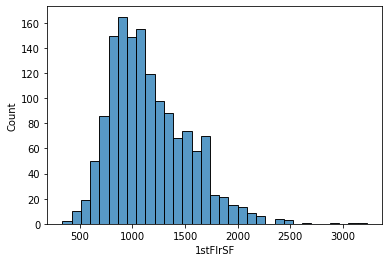

In [28]:
sns.histplot(df_train["1stFlrSF"])

We will apply the logarithmic transformation:

<AxesSubplot:xlabel='1stFlrSF_log', ylabel='Count'>

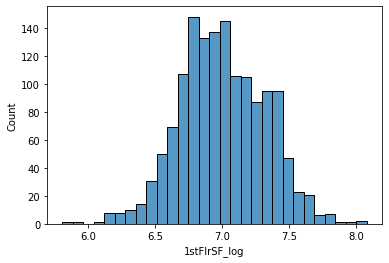

In [29]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.histplot(df_train["1stFlrSF_log"])

In [30]:
# Scaling
from sklearn.preprocessing import StandardScaler

num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
scaler = StandardScaler()

In [31]:
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+["1stFlrSF_log"]]))
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-1.730427,0.073400,-0.229905,-0.205430,0.654978,-0.517424,1.052001,0.879514,0.519179,0.610914,...,-0.063687,-0.087718,-1.602043,0.138826,0.346982,-0.464579,-0.242448,-0.074253,-0.805921,-0.805921
1,-1.728054,-0.872215,0.481508,-0.089068,-0.070070,2.178727,0.157594,-0.428846,-0.570811,1.235786,...,-0.063687,-0.087718,-0.490944,-0.614137,0.007105,-0.464579,-0.242448,-0.074253,0.424588,0.424588
2,-1.725680,0.073400,-0.087622,0.077887,0.654978,-0.517424,0.985749,0.831056,0.330099,0.105504,...,-0.063687,-0.087718,0.990520,0.138826,0.535802,-0.464579,-0.242448,-0.074253,-0.577359,-0.577359
3,-1.723307,0.309804,-0.467043,-0.094127,0.654978,-0.517424,-1.863105,-0.719593,-0.570811,-0.514773,...,-0.063687,-0.087718,-1.602043,-1.367100,-0.515297,-0.464579,-0.242448,-0.074253,-0.439148,-0.439148
4,-1.720934,0.073400,0.671219,0.382453,1.380027,-0.517424,0.952622,0.734141,1.375600,0.493751,...,-0.063687,-0.087718,2.101618,0.138826,0.869385,-0.464579,-0.242448,-0.074253,0.116177,0.116177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.722783,0.073400,-0.372188,-0.259362,-0.070070,-0.517424,0.919496,0.734141,-0.570811,-1.010995,...,-0.063687,-0.087718,0.620154,-0.614137,-0.074717,-0.464579,-0.242448,-0.074253,-0.465647,-0.465647
1455,1.725157,-0.872215,0.718646,0.272668,-0.070070,0.381293,0.223846,0.152647,0.090968,0.803889,...,-0.063687,-0.087718,-1.602043,1.644752,0.365864,-0.464579,-0.242448,-0.074253,1.997819,1.997819
1456,1.727530,0.309804,-0.182478,-0.145529,0.654978,3.077444,-1.001824,1.024887,-0.570811,-0.379231,...,-0.063687,4.951368,-0.490944,1.644752,1.077087,-0.464579,-0.242448,-0.074253,0.233041,0.233041
1457,1.729903,-0.872215,-0.087622,-0.077229,-0.795118,0.381293,-0.703688,0.540309,-0.570811,-0.898426,...,-0.063687,-0.087718,-0.861311,1.644752,-0.488548,-0.464579,-0.242448,-0.074253,-0.074961,-0.074961


In [32]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [33]:
df_train['Utilities']

0       4
1       4
2       4
3       4
4       4
       ..
1454    4
1455    4
1456    4
1457    4
1458    4
Name: Utilities, Length: 1459, dtype: int64

In [55]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])
df_dummy.to_csv("./df_dummy.csv",index=False)

# Walkthrough II

# Combination of Existing Features

We can start with a simple addition. We have two variables 1stFlrSF and 2ndFlrSF but we don't have the total square footage.

We can create a new feature which represents the sum of these two:

<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

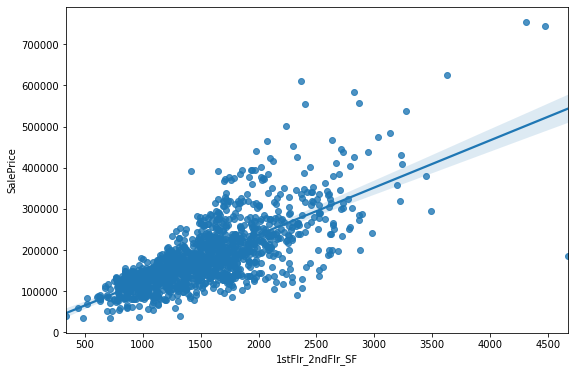

In [34]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

We can see that there is a significant relationship between the new variable and our target.

Another possibility is OverallGrade.

In [35]:
# overall quality of a house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]

In [36]:
df_train["OverallGrade"]

0       35
1       48
2       35
3       35
4       40
        ..
1454    30
1455    36
1456    63
1457    30
1458    30
Name: OverallGrade, Length: 1459, dtype: int64

Share some of your features on Slack or Zoom Chat!

Simplification of the Existing Features

(-0.5, 5.5, 0.0, 800000.0)

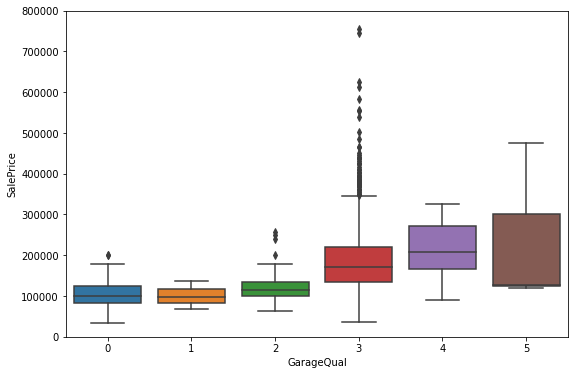

In [37]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

We can see that there are categories for which the SalePrice is similar. If we move from the category 0 to 1 or 2, there is no change in SalePrice. Therefore, we can merge these categories into one:

In [38]:
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

(-0.5, 2.5, 0.0, 800000.0)

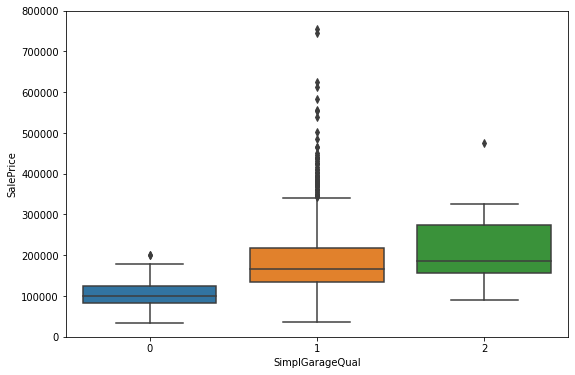

In [39]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In the end, we will create a new data-frame with numeric features only (including those we have created during transformations).

In [40]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]
df_numeric.to_csv("./df_numeric.csv",index=False)

We have two Pandas DataFrames ready:

* df_numeric
* df_dummy

We will use them to cover following two parts of this tutorial

* Variable Selection
* PCA (Principal Components Analysis)

**Variable Selection**  
We are going to implement elements for filter feature selectors based on the following criteria:

**Small variance**  
One of each pair of features, which are correlated together more than x  
Before doing any transformations we will extract our target variable to keep it as it is so we don't "accidentally" transform it.

In [42]:
y = df_numeric['SalePrice']
df_numeric.drop("SalePrice",axis=1, inplace=True)

/Users/seiryu8808/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Part 1: Removing Features With Small Variance

First of all, we will remove the columns with very little variance. Small variance equals small predictive power because all houses have very similar values.

For most of our variable selection, we can use methods from sklearn:

In [43]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_transformed = vt.fit_transform(df_numeric)

In [44]:
# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = df_numeric.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

Part 2: Removing Correlated Features  
The goal of this part is to remove one feature from each highly correlated pair.  
  
We are going to do this in 3 steps:
  
1. Calculate a correlation matrix
2. Get pairs of highly correlated features
3. Remove correlated columns


In [46]:
# step 1
df_corr = df_transformed.corr().abs()


In [47]:
# step 2
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]

In [48]:
# step 3
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [49]:
print(indices)


[('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', '1stFlr_2ndFlr_SF'), ('TotRmsAbvGrd', '1stFlr_2ndFlr_SF'), ('GarageCars', 'GarageArea'), ('GarageQual', 'GarageCond')]


Part 3: Forward Regression  
We have removed the features with no information and correlated features. The last thing we can do before modeling is to select the k-best features in terms of the relationship with the target variable. We will use the forward wrapper method for that:

In [50]:
from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k=10)
X = skb.fit_transform(df_transformed, y)

In [51]:
# this will give us the position of top 10 columns
skb.get_support()
# column names
df_transformed.columns[skb.get_support()]
X = pd.DataFrame(X,columns=df_transformed.columns[skb.get_support()])

In [52]:
X

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade
0,7.0,2003.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0
1,6.0,1976.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0
2,7.0,2001.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0
3,7.0,1915.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0
4,8.0,2000.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0
...,...,...,...,...,...,...,...,...,...,...
1454,6.0,1999.0,3.0,4.0,953.0,1647.0,2.0,3.0,2.0,30.0
1455,6.0,1978.0,3.0,4.0,1542.0,2073.0,2.0,3.0,2.0,36.0
1456,7.0,1941.0,5.0,3.0,1152.0,2340.0,2.0,4.0,1.0,63.0
1457,5.0,1950.0,3.0,3.0,1078.0,1078.0,1.0,4.0,1.0,30.0


# PCA

In [68]:
# import PCA
from sklearn.decomposition import PCA



In [75]:
# creation of PCA object
pca = PCA(n_components=3)
# applying fit_transform method
df_pca = pca.fit_transform(df_dummy)
# transforming results back to DataFrame
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ["component_1","component_2","component_3"]

When we check the shape of the df_pca we see that it has the same amount of rows but only 3 columns --> components of PCA.

Now, we will merge it back to X and we will use that table tomorrow to predict the SalePrice.


In [76]:
X

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade,...,0,1,2,3,4,5,6,7,8,SalePrice_y
0,7.0,2003.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0,...,-1.511498,-0.337451,1.000595,-0.322598,-0.590039,-0.822073,-0.112615,0.123562,0.291967,208500
1,6.0,1976.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0,...,0.315587,0.865029,-0.334657,-0.552380,-0.402818,0.762980,0.570651,0.068107,-0.604004,181500
2,7.0,2001.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0,...,-1.640737,-0.273115,0.805964,-0.321093,-0.410726,-0.246954,-0.569471,0.487956,0.224999,223500
3,7.0,1915.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0,...,1.144521,-0.895768,0.316895,-0.405597,1.122224,0.168306,0.746295,0.025522,0.494777,140000
4,8.0,2000.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0,...,-1.681285,-0.167821,0.911212,-0.422767,0.185372,0.024797,-0.302455,0.789677,0.265742,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,6.0,1999.0,3.0,4.0,953.0,1647.0,2.0,3.0,2.0,30.0,...,-1.102083,-0.793079,0.601772,-0.968573,-0.515569,-0.398129,0.054319,-0.582860,-0.151042,175000
1455,6.0,1978.0,3.0,4.0,1542.0,2073.0,2.0,3.0,2.0,36.0,...,0.429046,1.030790,-0.187973,-0.143121,-0.556147,-0.109306,0.077327,-0.040679,-0.024650,210000
1456,7.0,1941.0,5.0,3.0,1152.0,2340.0,2.0,4.0,1.0,63.0,...,-0.075797,-0.106431,0.746436,-0.549909,-0.532180,0.330612,0.021141,-1.077869,0.166056,266500
1457,5.0,1950.0,3.0,3.0,1078.0,1078.0,1.0,4.0,1.0,30.0,...,0.933630,1.030712,-0.956279,0.417731,-0.130273,-0.080481,-0.026208,-0.234945,-1.063940,142125


In [77]:
X = X.merge(df_pca, left_index=True, right_index=True)
X = X.merge(y, left_index=True, right_index=True)

In [78]:
X

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade,...,4,5,6,7,8,SalePrice_y,component_1_y,component_2_y,component_3_y,SalePrice
0,7.0,2003.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0,...,-0.590039,-0.822073,-0.112615,0.123562,0.291967,208500,-1.511498,-0.337451,1.000751,208500
1,6.0,1976.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0,...,-0.402818,0.762980,0.570651,0.068107,-0.604004,181500,0.315587,0.865015,-0.334814,181500
2,7.0,2001.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0,...,-0.410726,-0.246954,-0.569471,0.487956,0.224999,223500,-1.640737,-0.273116,0.806026,223500
3,7.0,1915.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0,...,1.122224,0.168306,0.746295,0.025522,0.494777,140000,1.144522,-0.895760,0.317351,140000
4,8.0,2000.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0,...,0.185372,0.024797,-0.302455,0.789677,0.265742,250000,-1.681285,-0.167821,0.911085,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,6.0,1999.0,3.0,4.0,953.0,1647.0,2.0,3.0,2.0,30.0,...,-0.515569,-0.398129,0.054319,-0.582860,-0.151042,175000,-1.102083,-0.793071,0.601859,175000
1455,6.0,1978.0,3.0,4.0,1542.0,2073.0,2.0,3.0,2.0,36.0,...,-0.556147,-0.109306,0.077327,-0.040679,-0.024650,210000,0.429047,1.030857,-0.186400,210000
1456,7.0,1941.0,5.0,3.0,1152.0,2340.0,2.0,4.0,1.0,63.0,...,-0.532180,0.330612,0.021141,-1.077869,0.166056,266500,-0.075797,-0.106420,0.746660,266500
1457,5.0,1950.0,3.0,3.0,1078.0,1078.0,1.0,4.0,1.0,30.0,...,-0.130273,-0.080481,-0.026208,-0.234945,-1.063940,142125,0.933629,1.030720,-0.956846,142125


In [79]:
pca.explained_variance_ratio_

array([0.13282151, 0.07840981, 0.04910124])

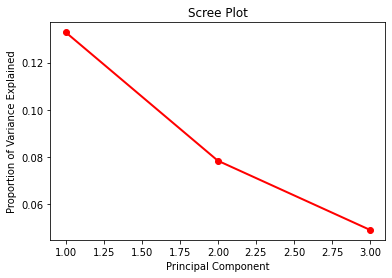

In [80]:
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()